# Intro to Image Processing

In [3]:
# !pip install numpy
# !pip install opencv-python
# !pip install matplotlib

In [1]:
import cv2

In [2]:
img = cv2.imread('images/books.jpg')
# cv2.imshow('image',img)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

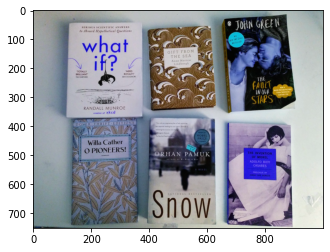

In [10]:
plt.imshow(img)

In [11]:
print(img)

[[[160 157 153]
  [158 155 150]
  [153 151 143]
  ...
  [133 161 162]
  [129 160 163]
  [129 163 163]]

 [[158 157 153]
  [155 155 149]
  [150 151 142]
  ...
  [131 159 160]
  [131 160 164]
  [132 163 164]]

 [[158 159 155]
  [155 157 151]
  [154 157 148]
  ...
  [131 156 158]
  [130 161 160]
  [130 163 159]]

 ...

 [[  9  14  15]
  [  5  12   9]
  [ 25  32  25]
  ...
  [244 244 238]
  [245 242 237]
  [243 240 235]]

 [[  0   0   4]
  [  0   3   7]
  [  0   2   3]
  ...
  [246 243 238]
  [246 243 238]
  [244 241 237]]

 [[  0   1  11]
  [ 12  11  20]
  [  2   0   6]
  ...
  [246 243 238]
  [246 243 238]
  [244 241 237]]]


In [12]:
# Checkin the Type of Image
print("Type of image is {}".format(type(img)))

Type of image is <class 'numpy.ndarray'>


In [13]:
#Dimension for image
print("Dimension for image is {}".format(img.shape))

#Image shape is tuple
#Length = first element of tuple
#width = second element of tuple
#No of channel = thrid element of tuple

Length = img.shape[0]
width = img.shape[1]
Channels = img.shape[2]

print("Length of image is {}".format(Length))
print("width of image is {}".format(width))
print("No of channels is {}".format(Channels))

Dimension for image is (750, 1000, 3)
Length of image is 750
width of image is 1000
No of channels is 3


## Image Resizing

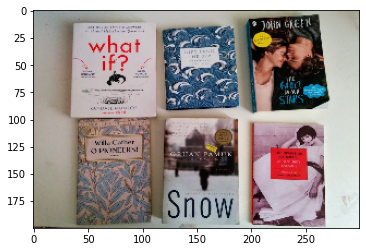

In [14]:
# Resizing the image using Length and width
Img_change_HW = cv2.resize(img, (300, 200))
plt.imshow(cv2.cvtColor(Img_change_HW, cv2.COLOR_BGR2RGB))
#plt.imshow(Img_change_HW)

## Image Cropping

Cropped Image 



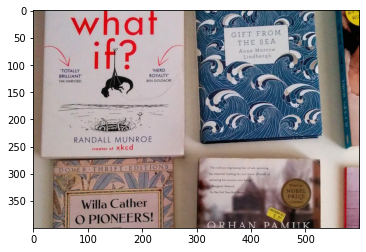

In [19]:
#Cropping image where following
# Start Row (y1) = 100
# Start Column(x1)= 100
# End row(y1+h) = 300
# End columns(x1+w) = 200

y1= 100
x1 =100
y2 = 500
x2 = 700

cropped_img = img[y1:y2,x1:x2]  ## ROI Extraction from Image

print("Cropped Image \n")

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
## Image Color Changes

In [ ]:
#Reading image in RGB format
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imshow('image',img)
cv2.waitKey(0)

#Converting image into HSV
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV',img)
cv2.waitKey(0)

#Converting image into HLS
img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
cv2.imshow('HLS',img)
cv2.waitKey(0)

#Converting image into Gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray',img)
cv2.waitKey(0)

## Adding Fonts to image

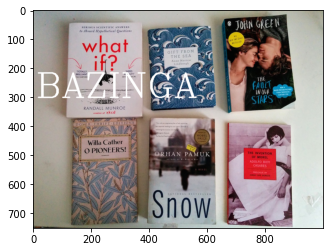

In [7]:
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img,text='BAZINGA',org=(10,300), fontFace=font,fontScale= 4,color=(255,255,255),thickness=4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

## Blur an image

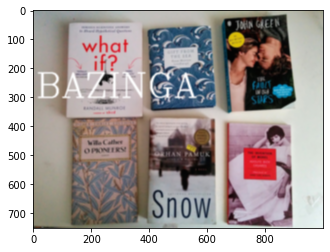

In [8]:
# apply a Gaussian blur with a 7x7 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(img, (7,7), 20)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB));

## Grayscale

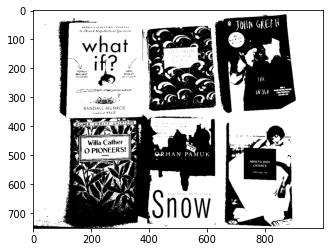

In [29]:
#Converting image into Grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Binary Thresholding
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB));

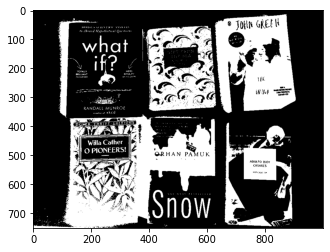

In [30]:
# Binary inverse Thresholding

ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB));

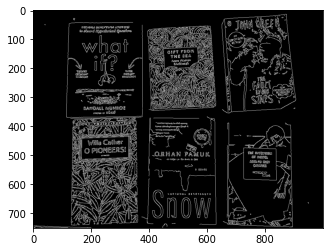

In [31]:
edges = cv2.Canny(img,100,200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB));

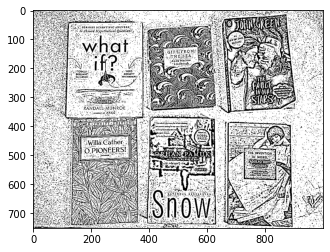

In [32]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(img,255,\
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

## Read Online image

In [4]:
# !pip install scikit-image
from skimage import io

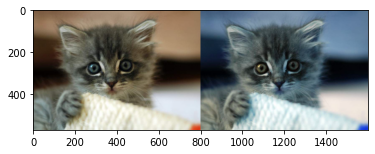

In [7]:
url = "https://placekitten.com/800/571" 
image = io.imread(url) 
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
final_frame = cv2.hconcat((image, image_2))
plt.imshow(final_frame)

## Image Histogram

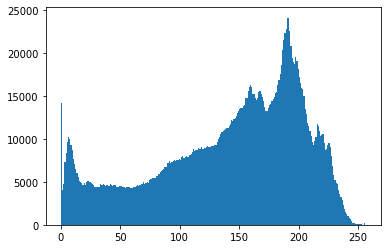

In [8]:
plt.hist(img.ravel(),bins = 256, range = [0,256]) 
plt.show()

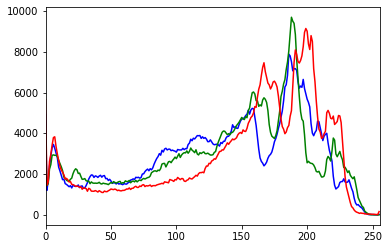

In [10]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

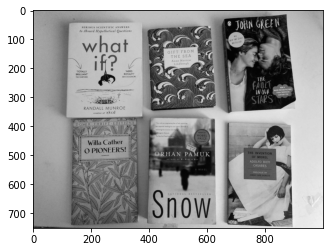

In [20]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB))

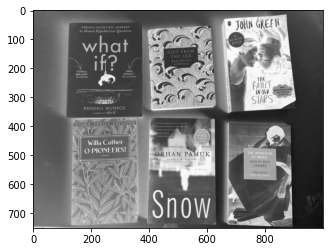

In [23]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB))

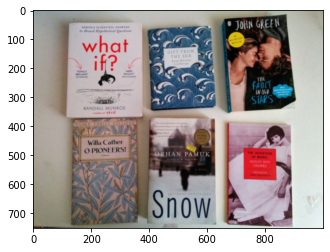

References:  
    1. https://www.kaggle.com/prayankkul/introduction-to-opencv-for-image-processing/notebook  
    2. https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb  
    3. https://github.com/piratefsh/image-processing-101/blob/master/Image%20Processing%20101.ipynb  